In [154]:
import torch
import torch.nn as nn
from torchsummary import summary

from PIL import Image

---
## GoogLeNet
---

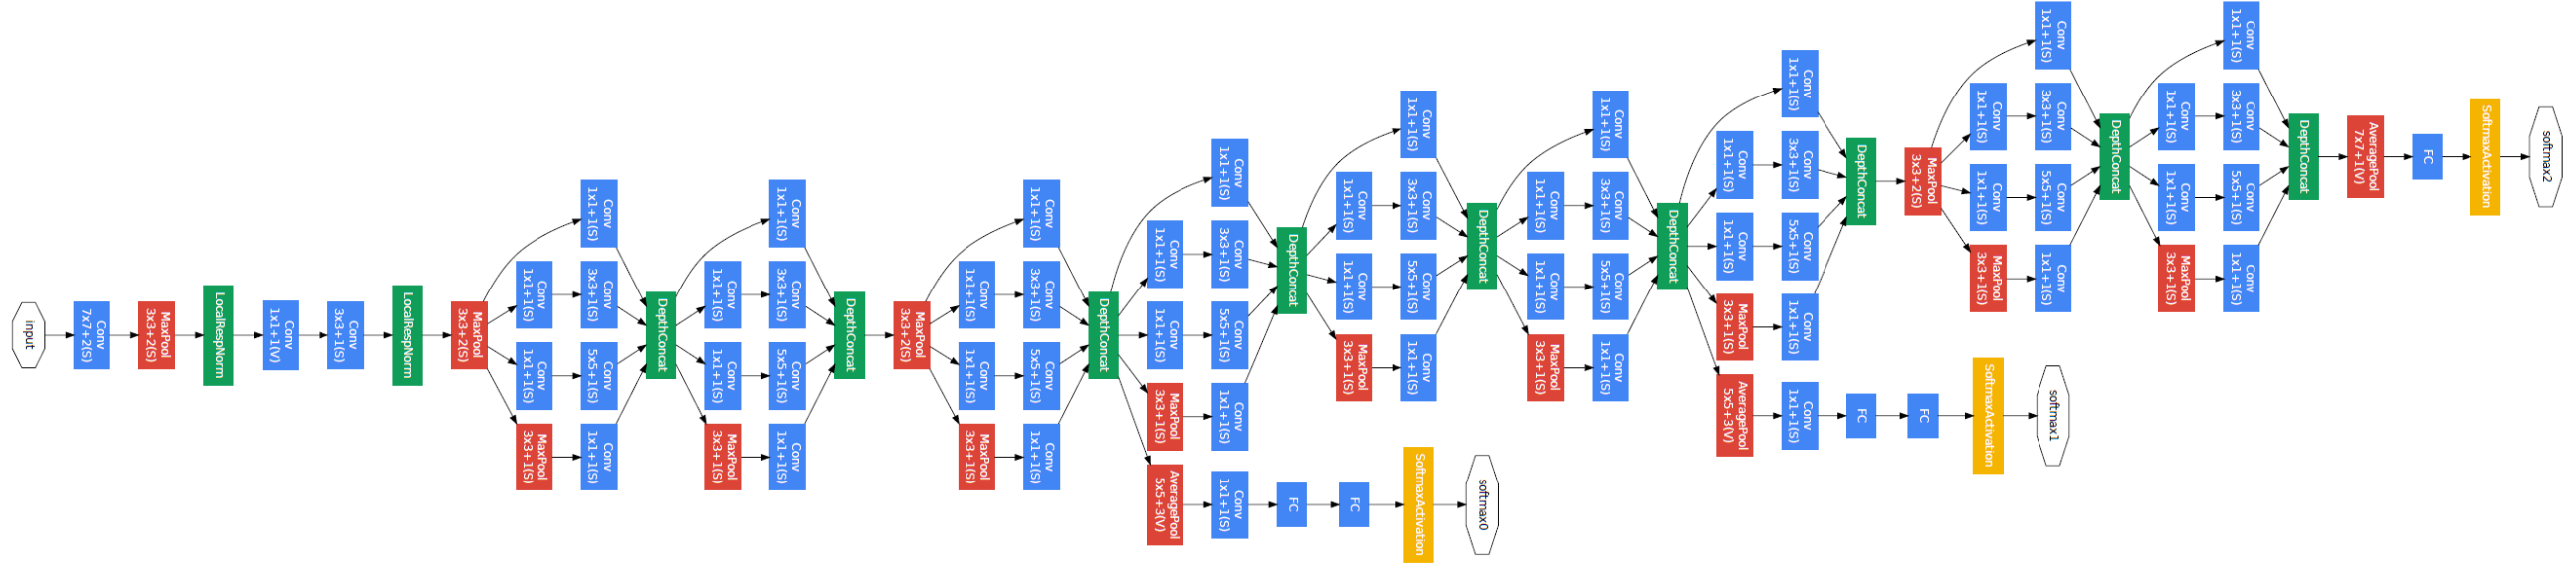

In [155]:
Image.open('GoogLeNet.png')

In [156]:
class Inception(nn.Module):
    def __init__(self,in_dim,out_dim1,mid_dim2,out_dim2,mid_dim3,out_dim3,out_dim4):
        super().__init__()

        self.conv1x1 = nn.Sequential(
            nn.Conv2d(in_dim,out_dim1,kernel_size=1,stride=1),
            nn.ReLU()
        )
        self.conv3x3 = nn.Sequential(
            nn.Conv2d(in_dim,mid_dim2,kernel_size=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(mid_dim2,out_dim2,kernel_size=3,stride=1,padding=1),
            nn.ReLU()
        )
        self.conv5x5 = nn.Sequential(
            nn.Conv2d(in_dim,mid_dim3,kernel_size=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(mid_dim3,out_dim3,kernel_size=5,stride=1,padding=2),
            nn.ReLU()
        )
        self.max3x3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
            nn.Conv2d(in_dim,out_dim4,kernel_size=1,stride=1)
        )
    
    def forward(self,x):
        out1x1 = self.conv1x1(x)
        out3x3 = self.conv3x3(x)
        out5x5 = self.conv5x5(x)
        out_sub = self.max3x3(x)
        output = torch.cat([out1x1,out3x3,out5x5,out_sub],1)
        return output

In [157]:
class GoogLeNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=7,stride=2,padding=3),
            nn.ReLU())
        
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        
        self.norm_layer1 = nn.LocalResponseNorm(2)

        self.conv_layer2=nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,stride=1,padding=1),
            nn.ReLU())
        
        self.conv_layer3=nn.Sequential(
            nn.Conv2d(in_channels=192,out_channels=192,kernel_size=3,stride=1,padding=1),
            nn.ReLU())

        self.norm_layer2 = nn.LocalResponseNorm(2)

        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

        self.inception3a = Inception(192,64,96,128,16,32,32)
        self.inception3b = Inception(256,128,128,192,32,96,64)

        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

        self.inception4a = Inception(480,192,96,208,16,48,64)
        self.inception4b = Inception(512,160,112,224,24,64,64)
        self.inception4c = Inception(512,128,128,256,24,64,64)
        self.inception4d = Inception(256,128,128,192,32,96,64)
        self.inception4e = Inception(256,128,128,192,32,96,64)

    def forward(self,x):
        x = self.conv_layer1(x)
        x = self.sub_sampling_layer1(x)
        x = self.norm_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.norm_layer2(x)
        x = self.sub_sampling_layer2(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.sub_sampling_layer3(x)
        return x

In [158]:
model = GoogLeNet()
summary(model,(3,224,224))
sample = torch.Tensor(3,224,224)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
              ReLU-2         [-1, 64, 112, 112]               0
         MaxPool2d-3           [-1, 64, 56, 56]               0
 LocalResponseNorm-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 192, 56, 56]         110,784
              ReLU-6          [-1, 192, 56, 56]               0
            Conv2d-7          [-1, 192, 56, 56]         331,968
              ReLU-8          [-1, 192, 56, 56]               0
 LocalResponseNorm-9          [-1, 192, 56, 56]               0
        MaxPool2d-10          [-1, 192, 28, 28]               0
           Conv2d-11           [-1, 64, 28, 28]          12,352
             ReLU-12           [-1, 64, 28, 28]               0
           Conv2d-13           [-1, 96, 28, 28]          18,528
             ReLU-14           [-1, 96,

In [159]:
inputs.shape

torch.Size([3, 224, 224])

In [160]:
model(inputs).shape

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 64 but got size 128 for tensor number 1 in the list.

In [ ]:
inputs = torch.Tensor(3,224,224)
inputs.shape

torch.Size([3, 224, 224])

In [ ]:
conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=7,stride=2,padding=3),
            nn.ReLU())
x = conv_layer1(inputs)
x.shape

torch.Size([64, 112, 112])

In [ ]:
sub_sampling_layer1 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
x = sub_sampling_layer1(x)
x.shape

torch.Size([64, 56, 56])

In [ ]:
conv_layer=nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=192,out_channels=192,kernel_size=3,stride=1,padding=1),
            nn.ReLU())
x = conv_layer(x)
x.shape

torch.Size([192, 56, 56])

In [ ]:
x.shape

torch.Size([192, 56, 56])

In [ ]:
x = sub_sampling_layer1(x)
x.shape

torch.Size([192, 28, 28])

In [ ]:
conv1x1 = nn.Sequential(
    nn.Conv2d(192,64,kernel_size=1,stride=1),
    nn.ReLU()
)
conv3x3 = nn.Sequential(
    nn.Conv2d(192,96,kernel_size=1,stride=1),
    nn.ReLU(),
    nn.Conv2d(96,128,kernel_size=3,stride=1),
    nn.ReLU()
)
conv5x5 = nn.Sequential(
    nn.Conv2d(192,16,kernel_size=1,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
    nn.ReLU()
)
max3x3 = nn.Sequential(
    nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
    nn.Conv2d(192,32,kernel_size=1,stride=1)
)

In [ ]:
x1 = conv1x1(x)
x1.shape

torch.Size([64, 28, 28])

In [ ]:
x2 = conv3x3(x)
x2.shape

torch.Size([128, 26, 26])